In [106]:
import joblib
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [107]:
# Output from ../scripts/hap_mapstats.py
data = joblib.load("../data/hap_mapstats.jl")
# Index is the directory, directory name structure {project}_{sample}_{haplotag}
sample = pd.Series(data.index, index=data.index).str.split('_', expand=True)
sample.columns = ['project', 'sample', 'haplotag']
data = data.join(sample)

data['appx genome % 1x'] = data["reference bases single covered"] / 3.2e9

# Join with metadata
meta = pd.read_csv("../../metadata/metadata.txt", sep='\t')
meta.set_index('Individual', inplace=True)
data['sex'] = data['sample'].map(meta['Sex'])
data['population'] = data['sample'].map(meta['Superpopulation code'])

In [136]:
print(len(data), "haplotypes")
print(len(data.groupby(['sample', 'project']).size()), 'samples')
print(len(data['sample'].unique()), 'individuals')

172 haplotypes
86 samples
79 individuals


[Text(0.5, 1.0, 'Percent of the reference (3.2e9bp) singly covered'),
 Text(0, 0.5, 'Haplotype count')]

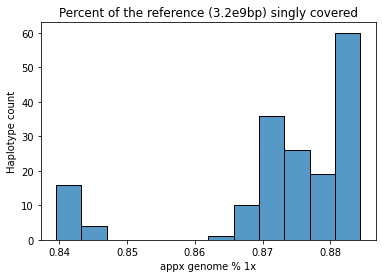

In [140]:
p = sb.histplot(data=data, x="appx genome % 1x")
p.set(title="Percent of the reference (3.2e9bp) singly covered", ylabel="Haplotype count")

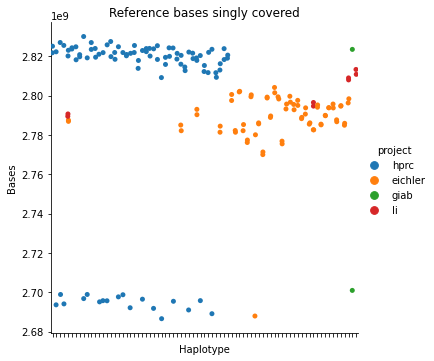

In [141]:
p = sb.catplot(data=data, x="sample", y="reference bases single covered", hue='project')
p.set(xticklabels=[], title="Reference bases singly covered", ylabel="Bases", xlabel="Haplotype")

Technically giab project is an hprc assembly.

What's up with the 2.70e9 vs 2.82e9?
Is it a sex difference?

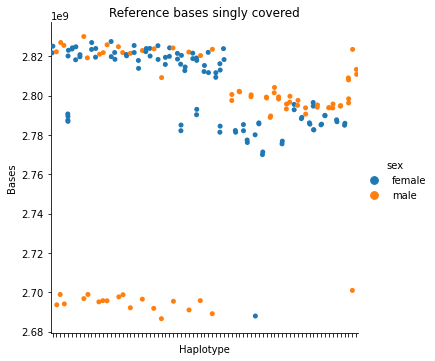

In [142]:
p = sb.catplot(data=data, x="sample", y="reference bases single covered", hue='sex')
p.set(xticklabels=[], title="Reference bases singly covered", ylabel="Bases", xlabel="Haplotype")

Ok, so the lower bin is almost exclusively males. But males aren't exclusive to the lower bin..

In [137]:
data['is_lower_cov'] = data["reference bases single covered"] < 2.72e9
data.groupby(['is_lower_cov', 'sex']).size().unstack()

sex,female,male
is_lower_cov,,
False,95,55
True,1,19


Let's check population real quick

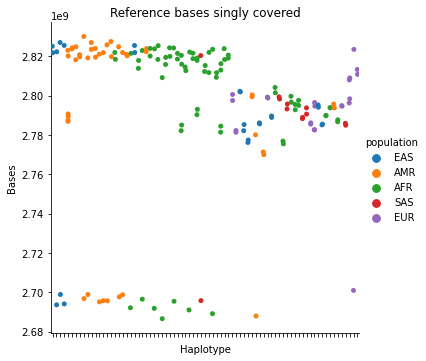

In [143]:
p = sb.catplot(data=data, x="sample", y="reference bases single covered", hue='population')
p.set(xticklabels=[], title="Reference bases singly covered", ylabel="Bases", xlabel="Haplotype")

Okay, not that. How big is chromosome X?

In [121]:
2.82e9 - 156040895

2663959105.0

So, that makes it plausible it's sex?... kinda

In [129]:
# looking at the lower_covered 
data[data["is_lower_cov"]]

,Number of mapped sequences,Number of primary alignments,Number of secondary alignments,Number of primary alignments with >65535 CIGAR operations,Number of bases in mapped sequences,Number of mapped bases,Number of substitutions,"Number of insertions in [0,50)","Number of insertions in [50,100)","Number of insertions in [100,300)",...,"Number of deletions in [1000,inf)",reference bases single covered,reference bases uncovered,reference bases multi covered,project,sample,haplotag,sex,population,is_lower_cov
hprc_HG005_H1,997,1687,0,0,11067736126,2808852891,9339259,424563,3900,4985,...,1113,2693574795,370998303,23696734,hprc,HG005,H1,male,EAS,True
hprc_HG00621_H1,575,1212,0,0,10790176931,2782442122,7995243,396780,3660,4478,...,924,2698842428,372395569,17031835,hprc,HG00621,H1,male,EAS,True
hprc_HG00673_H1,676,1392,0,0,7703990819,2790103898,9808089,403721,3571,4690,...,1042,2694051175,372449016,21769641,hprc,HG00673,H1,male,EAS,True
hprc_HG01106_H1,653,1510,0,0,16694025317,2800766727,9294469,399186,3703,4671,...,993,2696747506,371293235,20229091,hprc,HG01106,H1,male,AMR,True
hprc_HG01109_H1,783,1552,0,0,9978657048,2798527303,10882661,422325,4027,4898,...,1101,2698851527,367247767,22170538,hprc,HG01109,H1,male,AMR,True
hprc_HG01243_H1,801,1434,0,0,10475675728,2788673111,9678460,422387,3877,4981,...,1077,2695087273,369815879,23366680,hprc,HG01243,H1,male,AMR,True
hprc_HG01258_H1,595,1373,0,0,9863256924,2793359331,10262081,408772,3720,4720,...,1090,2695692574,369152932,23424326,hprc,HG01258,H1,male,AMR,True
hprc_HG01358_H1,882,1607,0,0,15672708864,2806303662,9974078,400709,3915,5174,...,991,2695636090,368122770,24510972,hprc,HG01358,H1,male,AMR,True
hprc_HG01928_H1,646,1471,0,0,12608706693,2796848987,10647793,406428,3819,4722,...,1102,2697628725,369458400,21182707,hprc,HG01928,H1,male,AMR,True
hprc_HG01952_H1,663,1326,0,0,8064569583,2784374273,9217817,396149,3555,4640,...,1010,2698708602,372204923,17356307,hprc,HG01952,H1,male,AMR,True


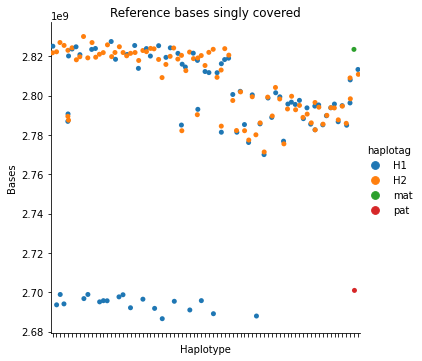

In [144]:
# There's a pattern in haplotag?
p = sb.catplot(data=data, x="sample", y="reference bases single covered", hue='haplotag')
p.set(xticklabels=[], title="Reference bases singly covered", ylabel="Bases", xlabel="Haplotype")

The one female in the lower bin is an eichler assembly. I have previously seen evidence that the parental haplotype assignment of contigs in the eichler/li assemblies aren't perfect. So it's possible some of the `eichler_HG00732_H1` assembly actually belongs in `eichler_HG00732_H2`. That's reasonable to consider but still doesn't explain the pattern.

In [146]:
data[data['is_lower_cov'] & (data['sex'] == 'female')][['project', 'sample']]

,project,sample
eichler_HG00732_H1,eichler,HG00732
